<a href="https://colab.research.google.com/github/vangalakoushik/Project2/blob/main/infobharthpj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df = pd.read_csv("reviews.csv")
df.head()


,review_id,review_text,rating,timestamp,product,category
0,1,Average performance for the price,3,2023-04-06,Camera,Electronics
1,2,Extremely disappointed with the product,2,2023-03-22,Smartwatch,Accessories
2,3,The product is okay but nothing special,3,2023-06-17,Camera,Gadgets
3,4,"Highly recommended product, exceeded expectations",4,2023-10-26,Smartwatch,Gadgets
4,5,Customer support was very helpful and responsive,4,2023-12-29,Laptop,Electronics


In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    1200 non-null   int64 
 1   review_text  1200 non-null   object
 2   rating       1200 non-null   int64 
 3   timestamp    1200 non-null   object
 4   product      1200 non-null   object
 5   category     1200 non-null   object
dtypes: int64(2), object(4)
memory usage: 56.4+ KB


,0
review_id,0
review_text,0
rating,0
timestamp,0
product,0
category,0


In [8]:
df.tail()

,review_id,review_text,rating,timestamp,product,category
1195,1196,Extremely disappointed with the product,2,2023-02-10,Headphones,Accessories
1196,1197,Decent product with some issues,3,2023-02-28,Headphones,Accessories
1197,1198,Customer support was unresponsive,1,2023-03-23,Smartphone,Accessories
1198,1199,Not worth the money at all,1,2023-10-03,Smartwatch,Accessories
1199,1200,Delivery was late and packaging was damaged,1,2023-03-18,Smartwatch,Accessories


In [9]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review_text'].apply(clean_text)
df[['review_text', 'clean_review']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review_text,clean_review
0,Average performance for the price,average performance price
1,Extremely disappointed with the product,extremely disappointed product
2,The product is okay but nothing special,product okay nothing special
3,"Highly recommended product, exceeded expectations",highly recommended product exceeded expectation
4,Customer support was very helpful and responsive,customer support helpful responsive


In [10]:
def sentiment_label(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df['sentiment'] = df['rating'].apply(sentiment_label)
df[['rating', 'sentiment']].head()


,rating,sentiment
0,3,neutral
1,2,negative
2,3,neutral
3,4,positive
4,4,positive


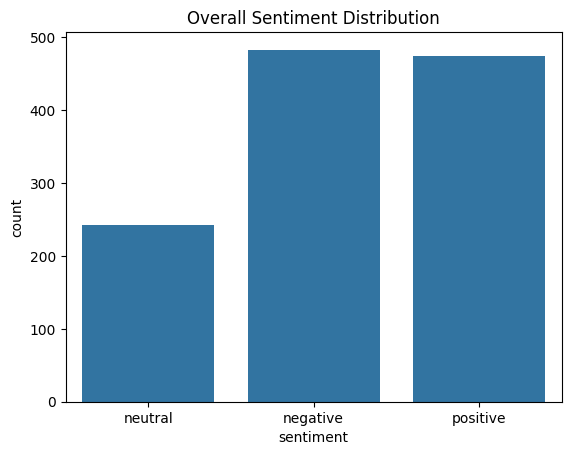

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       100
     neutral       1.00      1.00      1.00        44
    positive       1.00      1.00      1.00        96

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [14]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       100
     neutral       1.00      1.00      1.00        44
    positive       1.00      1.00      1.00        96

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



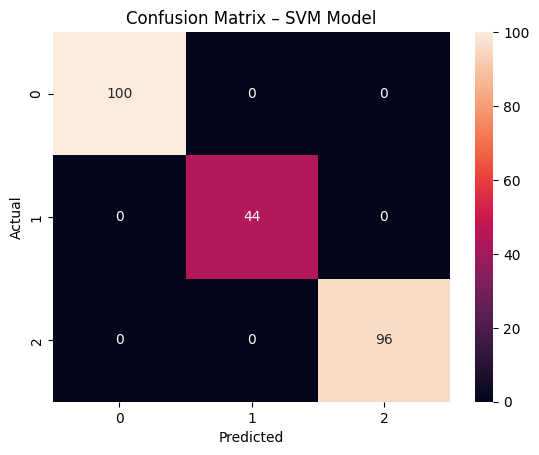

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix – SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def top_keywords(sentiment):
    text = df[df.sentiment == sentiment]['clean_review']
    vectorizer = CountVectorizer(max_features=10)
    X = vectorizer.fit_transform(text)
    return vectorizer.get_feature_names_out()

print("Positive Keywords:", top_keywords("positive"))
print("Negative Keywords:", top_keywords("negative"))


Positive Keywords: ['customer' 'excellent' 'helpful' 'money' 'perfectly' 'product' 'quality'
 'responsive' 'support' 'work']
Negative Keywords: ['damaged' 'delivery' 'late' 'money' 'packaging' 'quality' 'quickly'
 'stopped' 'working' 'worth']


In [17]:
df.groupby('product')['rating'].mean().sort_values(ascending=False)


,rating
product,
Headphones,3.121339
Camera,3.120833
Laptop,3.032653
Smartwatch,2.913043
Smartphone,2.886179


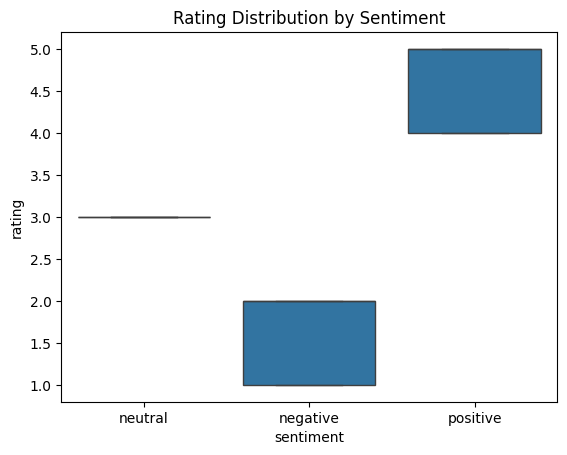

In [18]:
sns.boxplot(x='sentiment', y='rating', data=df)
plt.title("Rating Distribution by Sentiment")
plt.show()


In [19]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

feature_names = tfidf.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:",
          [feature_names[i] for i in topic.argsort()[-10:]])


Topic 1: ['could', 'acceptable', 'better', 'exceeded', 'expectation', 'highly', 'recommended', 'customer', 'support', 'unresponsive']
Topic 2: ['product', 'nothing', 'okay', 'special', 'value', 'great', 'feature', 'amazing', 'worth', 'money']
Topic 3: ['customer', 'quality', 'decent', 'issue', 'delivery', 'product', 'performance', 'extremely', 'disappointed', 'satisfied']
Topic 4: ['bad', 'quality', 'poor', 'quickly', 'stopped', 'working', 'delivery', 'damaged', 'packaging', 'late']
Topic 5: ['price', 'product', 'quality', 'customer', 'support', 'work', 'excellent', 'perfectly', 'helpful', 'responsive']


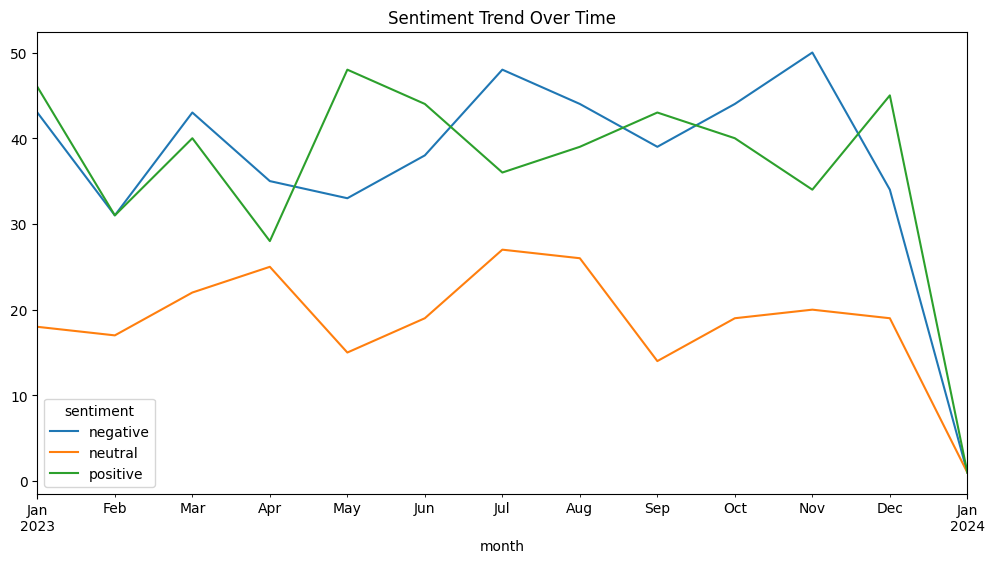

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M')

trend = df.groupby(['month', 'sentiment']).size().unstack()
trend.plot(figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.show()


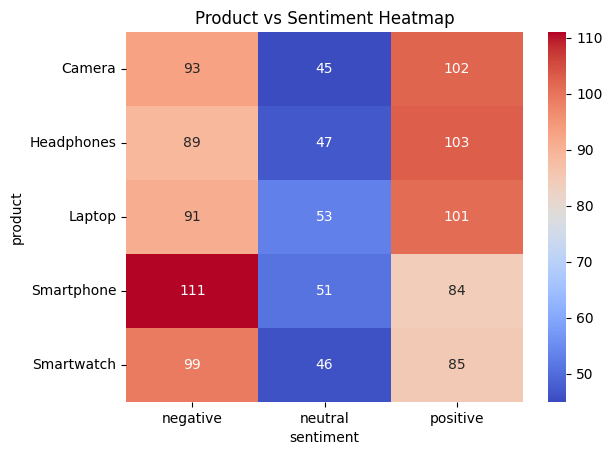

In [21]:
heatmap_data = pd.crosstab(df['product'], df['sentiment'])

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title("Product vs Sentiment Heatmap")
plt.show()
